# The Raven by E. A. Poe - NLP analysis

In [94]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the data.
df1 = pd.read_csv('the_raven.csv')

In [5]:
# View the data.
df1.head()

,paragraph,ftext,stext
0,1,"Once upon a midnight dreary, while I pondered,...","Once upon a midnight dreary, while I pondered,..."
1,2,NaN,"Ah, distinctly I remember it was in the b..."
2,3,NaN,"And the silken, sad, uncertain rustling of eac..."
3,4,NaN,Presently my soul grew stronger; hesitating th...
4,5,NaN,"Deep into that darkness peering, long I stood ..."


In [35]:
# Make a copy of the original dataframe to work from.
df2 = df1.copy()

###  1. Change text to lower case

In [36]:
# ftext: Change all to lower case.
df2['ftext'] = df2['ftext'].str.lower()

#View output.
df2.head()

,paragraph,ftext,stext
0,1,"once upon a midnight dreary, while i pondered,...","Once upon a midnight dreary, while I pondered,..."
1,2,NaN,"Ah, distinctly I remember it was in the b..."
2,3,NaN,"And the silken, sad, uncertain rustling of eac..."
3,4,NaN,Presently my soul grew stronger; hesitating th...
4,5,NaN,"Deep into that darkness peering, long I stood ..."


### 2. Replace punctuation

In [70]:
# Create a string to store 'ftext'.
raven = str(df2['ftext'][0])
raven

'once upon a midnight dreary, while i pondered, weak and weary,\nover many a quaint and curious volume of forgotten lore—\n    while i nodded, nearly napping, suddenly there came a tapping,\nas of some one gently rapping, rapping at my chamber door.\n“’tis some visitor,” i muttered, “tapping at my chamber door—\n            only this and nothing more.”\n\n    ah, distinctly i remember it was in the bleak december;\nand each separate dying ember wrought its ghost upon the floor.\n    eagerly i wished the morrow;—vainly i had sought to borrow\n    from my books surcease of sorrow—sorrow for the lost lenore—\nfor the rare and radiant maiden whom the angels name lenore—\n            nameless here for evermore.\n\n    and the silken, sad, uncertain rustling of each purple curtain\nthrilled me—filled me with fantastic terrors never felt before;\n    so that now, to still the beating of my heart, i stood repeating\n    “’tis some visitor entreating entrance at my chamber door—\nsome late visi

In [71]:
# Remove punctuation.
import string

for character in string.punctuation:
    raven = raven.replace(character, '')
    
raven

'once upon a midnight dreary while i pondered weak and weary\nover many a quaint and curious volume of forgotten lore—\n    while i nodded nearly napping suddenly there came a tapping\nas of some one gently rapping rapping at my chamber door\n“’tis some visitor” i muttered “tapping at my chamber door—\n            only this and nothing more”\n\n    ah distinctly i remember it was in the bleak december\nand each separate dying ember wrought its ghost upon the floor\n    eagerly i wished the morrow—vainly i had sought to borrow\n    from my books surcease of sorrow—sorrow for the lost lenore—\nfor the rare and radiant maiden whom the angels name lenore—\n            nameless here for evermore\n\n    and the silken sad uncertain rustling of each purple curtain\nthrilled me—filled me with fantastic terrors never felt before\n    so that now to still the beating of my heart i stood repeating\n    “’tis some visitor entreating entrance at my chamber door—\nsome late visitor entreating entran

In [72]:
# Replace remaining punctuation and "\n".
raven = raven.replace('\n', ' ')
raven = raven.replace('—', ' ')
raven = raven.replace('”', ' ')
raven = raven.replace('“', ' ')
raven = raven.replace('’', ' ')

raven

'once upon a midnight dreary while i pondered weak and weary over many a quaint and curious volume of forgotten lore      while i nodded nearly napping suddenly there came a tapping as of some one gently rapping rapping at my chamber door   tis some visitor  i muttered  tapping at my chamber door              only this and nothing more       ah distinctly i remember it was in the bleak december and each separate dying ember wrought its ghost upon the floor     eagerly i wished the morrow vainly i had sought to borrow     from my books surcease of sorrow sorrow for the lost lenore  for the rare and radiant maiden whom the angels name lenore              nameless here for evermore      and the silken sad uncertain rustling of each purple curtain thrilled me filled me with fantastic terrors never felt before     so that now to still the beating of my heart i stood repeating       tis some visitor entreating entrance at my chamber door  some late visitor entreating entrance at my chamber d

### 3. Tokenise the text

In [73]:
# Apply tokenisation.
raven2 = word_tokenize(raven)

# View result.
raven2

['once',
 'upon',
 'a',
 'midnight',
 'dreary',
 'while',
 'i',
 'pondered',
 'weak',
 'and',
 'weary',
 'over',
 'many',
 'a',
 'quaint',
 'and',
 'curious',
 'volume',
 'of',
 'forgotten',
 'lore',
 'while',
 'i',
 'nodded',
 'nearly',
 'napping',
 'suddenly',
 'there',
 'came',
 'a',
 'tapping',
 'as',
 'of',
 'some',
 'one',
 'gently',
 'rapping',
 'rapping',
 'at',
 'my',
 'chamber',
 'door',
 'tis',
 'some',
 'visitor',
 'i',
 'muttered',
 'tapping',
 'at',
 'my',
 'chamber',
 'door',
 'only',
 'this',
 'and',
 'nothing',
 'more',
 'ah',
 'distinctly',
 'i',
 'remember',
 'it',
 'was',
 'in',
 'the',
 'bleak',
 'december',
 'and',
 'each',
 'separate',
 'dying',
 'ember',
 'wrought',
 'its',
 'ghost',
 'upon',
 'the',
 'floor',
 'eagerly',
 'i',
 'wished',
 'the',
 'morrow',
 'vainly',
 'i',
 'had',
 'sought',
 'to',
 'borrow',
 'from',
 'my',
 'books',
 'surcease',
 'of',
 'sorrow',
 'sorrow',
 'for',
 'the',
 'lost',
 'lenore',
 'for',
 'the',
 'rare',
 'and',
 'radiant',
 'mai

### 4. Remove the stopwords

In [74]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
raven2 = [x for x in raven2 if x.lower() not in english_stopwords]

### 5. Create word cloud

In [78]:
# Transform the list of raven2 tokens into a string:
raven3 = ' '.join(raven2)

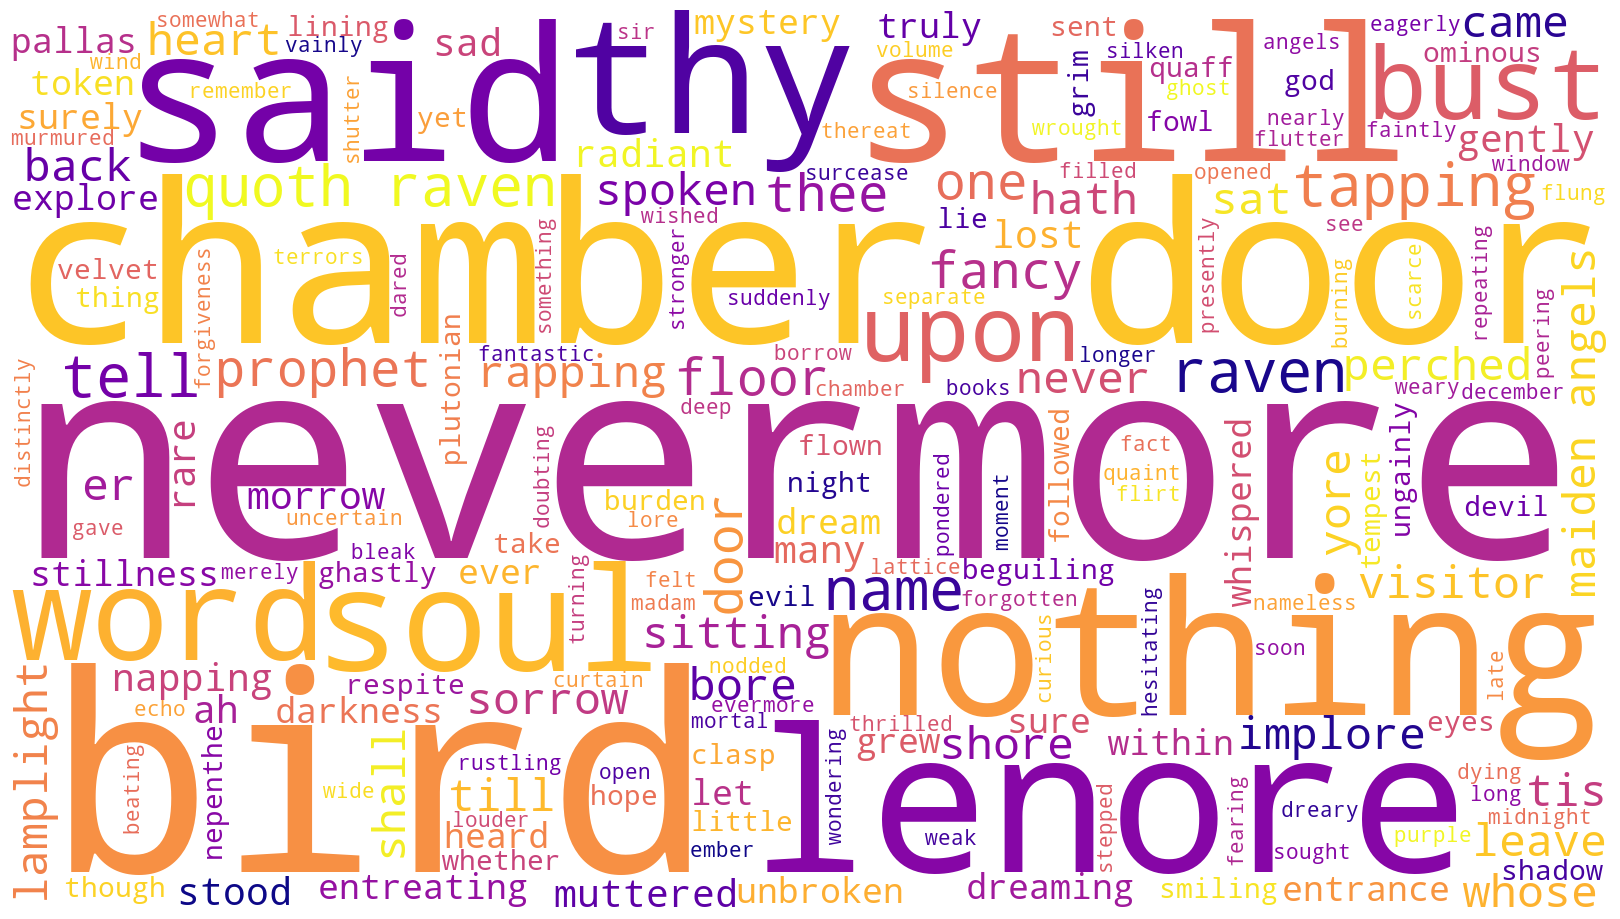

In [79]:
# Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(raven3)

# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [106]:
# Create an array from a raven image to use as a mask.
raven_mask1 = np.array(Image.open('crow-raven-flying3.jpg'))

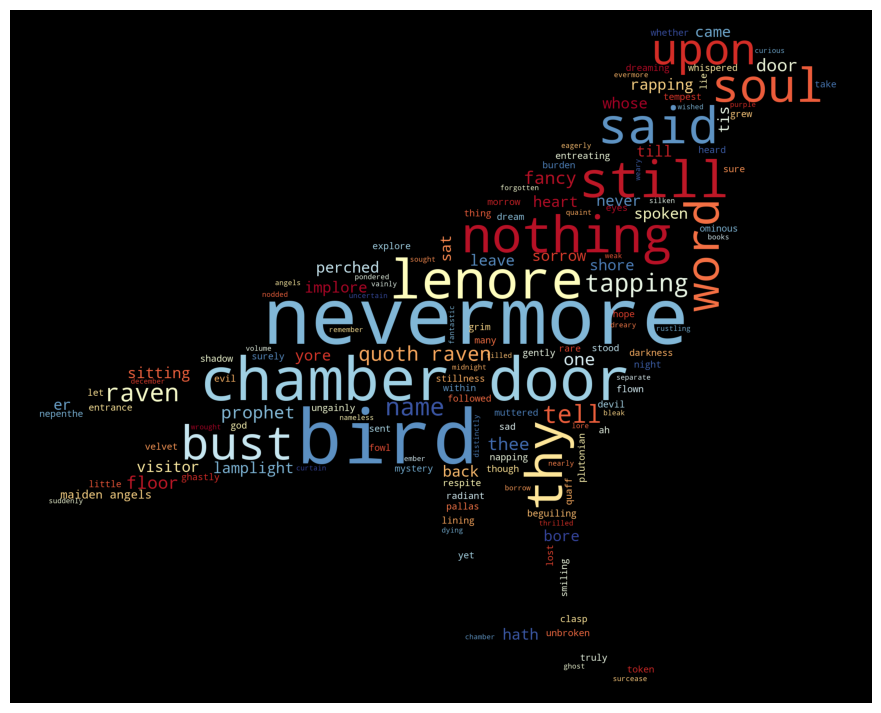

In [130]:
# Generate word cloud with the mask.
raven_cloud = WordCloud(scale=3,
                    max_words=150,
                    mask=raven_mask1,
                    colormap='RdYlBu',
                    background_color='black',
                    collocations=True).generate(raven3)

plt.figure(figsize=(20,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [128]:
# Save as a .png.
raven_cloud.to_file('the_raven_wordcloud.png')

### 6. Identify 15 most common words and polarity

In [88]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
counts_raven = pd.DataFrame(Counter(raven2).most_common(15),
                      columns=['Word', 'Frequency'])
counts_raven

,Word,Frequency
0,door,14
1,chamber,11
2,nevermore,11
3,raven,10
4,bird,10
5,lenore,8
6,nothing,7
7,still,7
8,said,7
9,thy,7


In [86]:
# Define function to generate polarity.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [93]:
# Generate polarity score for full text (without stopwords).
generate_polarity(raven3)

-0.0637915543575921